In [ ]:
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install scipy

In [1]:
import matplotlib.pyplot as plt
import monte_carlo_option as mco
import numpy as np

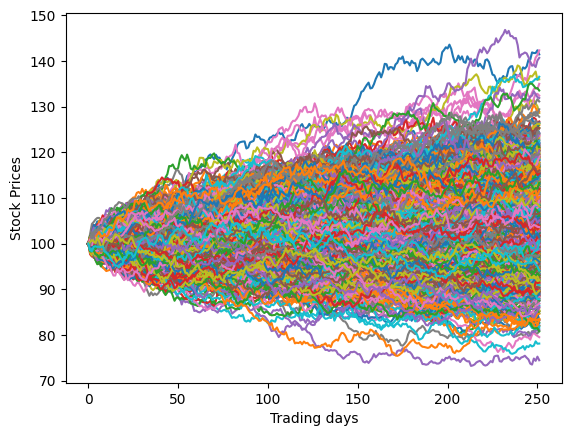

In [2]:
asset_prices = mco.monte_carlo.S_sim(S0=100, r=0.04, T=1, sigma=0.1, dlta=0.00, N=252, numiter=1000)
plt.figure()
plt.plot(range(252),asset_prices)
plt.xlabel("Trading days")
plt.ylabel("Stock Prices")
plt.show()

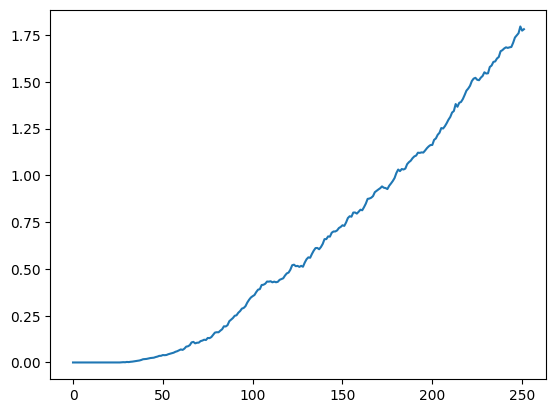

In [3]:
a = mco.monte_carlo.mc_call(asset_prices, r=0.04, T=1, N=252, numiter=1000, K=110)
plt.figure()
plt.plot(a)
plt.show()

# Antithetic pairs of Stock price

In [4]:
S_test = mco.monte_carlo.antithetic_asset_pairs(S0=100, r=0.04, T=1, sigma=0.1, dlta=0.00, N=252)

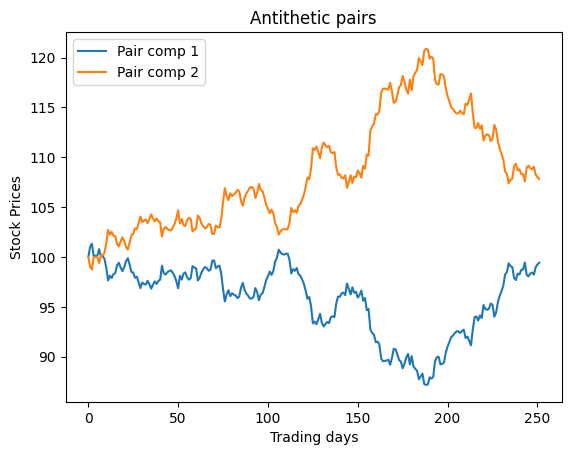

In [5]:
plt.plot(S_test)
plt.xlabel("Trading days")
plt.ylabel("Stock Prices")
plt.title('Antithetic pairs')
plt.legend(['Pair comp 1','Pair comp 2'])
plt.show()

In [34]:
np.shape(S_test)

(252, 2)

In [39]:
call_s_test = np.zeros(np.shape(S_test))

for i in range(np.shape(S_test)[0]):
    for j in range(np.shape(S_test)[1]):
        call_s_test[i,j] = mco.monte_carlo.call(S=S_test[i,j], K=110)

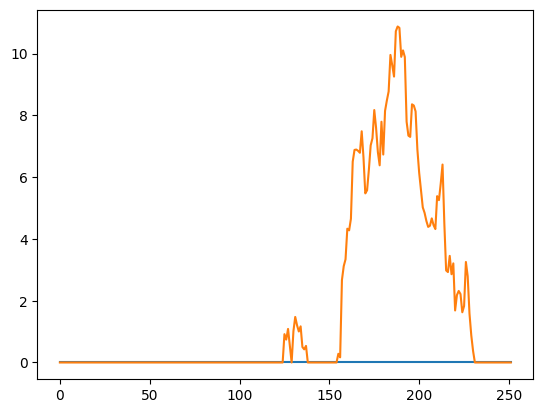

In [46]:
plt.plot(call_s_test)

(array([166.,   5.,   6.,   2.,   4.,   1.,   3.,   3.,   5.,   2.,   0.,
          3.,   7.,   2.,   2.,   4.,   1.,   4.,   6.,   3.,   5.,   2.,
          4.,   2.,   1.,   1.,   1.,   4.,   0.,   3.]),
 array([ 0.        ,  0.36257835,  0.7251567 ,  1.08773505,  1.45031341,
         1.81289176,  2.17547011,  2.53804846,  2.90062681,  3.26320516,
         3.62578351,  3.98836186,  4.35094022,  4.71351857,  5.07609692,
         5.43867527,  5.80125362,  6.16383197,  6.52641032,  6.88898867,
         7.25156703,  7.61414538,  7.97672373,  8.33930208,  8.70188043,
         9.06445878,  9.42703713,  9.78961548, 10.15219384, 10.51477219,
        10.87735054]),
 <BarContainer object of 30 artists>)

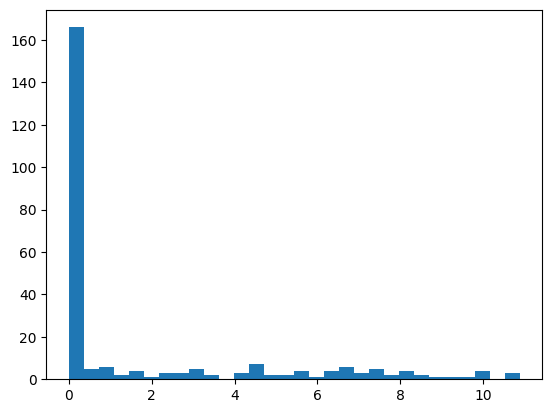

In [45]:
plt.hist(call_s_test[:,1],30)

# Multiple Stochastic Factors -- Correlated Stock Price

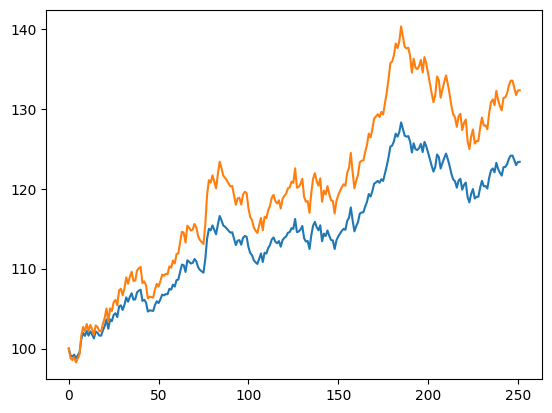

In [3]:
correlated_stocks = mco.monte_carlo.correlated_price(S0=100, r=0.04, T=1, sigma=0.1, dlta=0.00, N=252, rho=0.8)
plt.plot(correlated_stocks)
plt.show()

# Barrier call option using Monte Carlo

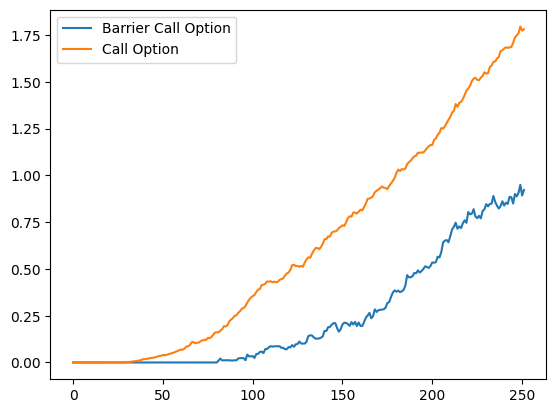

In [9]:
b = mco.monte_carlo.mc_barrier_call(asset_prices, r=0.04, T=1, N=252, numiter=1000, K=110, H = 120)
plt.figure()
plt.plot(b)
plt.plot(a)
plt.legend(['Barrier Call Option', 'Call Option'])
plt.show()